# **Adaptabilidad a la educación en línea**
***
#### *Matias Ibarra - Bootcamp Data Science - The Bridge School - Año 2023*
***

<img src="../images/alumno.jpg" width ="800" height="400">

***
## Entrenamiento del modelo de evaluación:


### Importación de librerias

In [70]:
# Importaciones necesarias:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.decomposition import PCA
import os
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Estilo de gráficos a utilizar:
plt.style.use('seaborn-v0_8-ticks')


### Carga de datos:

In [72]:
# Cargamos los datos de test y train

df_train  = pd.read_csv('../data/train/train.csv')
df_test  = pd.read_csv('../data/test/test.csv')

In [73]:
df_train

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Institution_Type_Government,Institution_Type_Non Government,Gender_Boy,Gender_Girl,Adaptivity Level
0,4,2,1,0,0,1,0,1,1,1,2,0,1,1,0,1
1,2,0,0,1,0,1,0,2,2,0,0,0,1,0,1,1
2,2,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0
3,2,0,0,1,0,1,1,2,0,0,0,0,1,1,0,0
4,4,2,1,1,0,1,1,1,2,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,3,1,0,1,1,1,1,2,2,0,0,0,1,0,1,1
899,4,2,1,1,0,2,1,2,2,0,2,0,1,0,1,2
900,2,0,0,1,1,0,1,2,1,0,0,0,1,1,0,0
901,4,2,0,1,0,1,0,2,0,0,0,0,1,1,0,0


In [74]:
df_test

,Age,Education Level,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Institution_Type_Government,Institution_Type_Non Government,Gender_Boy,Gender_Girl,Adaptivity Level
0,2,0,0,1,0,1,1,2,1,0,2,0,1,0,1,1
1,3,1,0,1,0,1,1,2,1,0,0,0,1,1,0,1
2,3,1,1,1,0,1,1,2,1,1,1,1,0,1,0,1
3,4,2,0,1,0,1,1,1,1,1,0,0,1,0,1,2
4,4,2,1,0,0,1,0,1,1,1,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
298,0,0,0,1,0,1,1,2,1,0,0,0,1,1,0,0
299,4,2,1,1,0,1,1,2,1,1,0,0,1,1,0,1
300,4,2,1,1,1,0,1,2,1,1,2,0,1,1,0,2



### Conjunto de test y train

A los datasets de test y train debemos separarlos en X e y.

In [75]:
X_test = df_test.iloc[:, :-1]
y_test = df_test['Adaptivity Level']

# Vemos el recuento de cada categoria del target
# Hay pocos registros de la categoria 0 (high)
y_test.value_counts()

Adaptivity Level
1    144
0    127
2     31
Name: count, dtype: int64

In [76]:
X_train = df_train.iloc[:, :-1]
y_train = df_train['Adaptivity Level']

# Vemos el recuento de cada categoria del target
# Hay pocos registros de la categoria 0 (high)
y_train.value_counts()

Adaptivity Level
1    481
0    353
2     69
Name: count, dtype: int64

Los distintos valores del target estan desbalanceados, hay muchos valores 2 y 1 y muy pocos valores 0.

Aplicamos over-sampling sobre el conjunto de train (sobre el de test no).

In [77]:
# Mediante SMOTE vamos a oversamplear los datos

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# No hacer el test sobre el conjunto sampleado.
# X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)


In [78]:
y_train_resampled.value_counts()

Adaptivity Level
1    481
0    481
2    481
Name: count, dtype: int64

Vemos graficamente como se distribuyen los valores antes y después del oversampler.

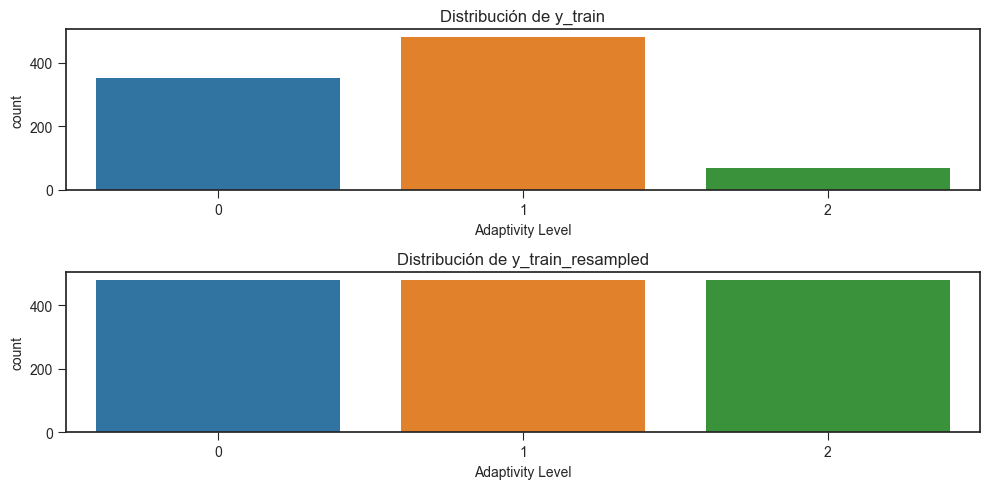

In [79]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
sns.countplot(x=y_train)
plt.title('Distribución de y_train')

plt.subplot(2, 1, 2)
sns.countplot(x=y_train_resampled)
plt.title('Distribución de y_train_resampled')

plt.tight_layout()
plt.show()


### RandomForestClassifier

Un bosque aleatorio es un metaestimador que ajusta una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza promedios para mejorar la precisión predictiva y controlar el sobreajuste.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### Entrenamiento

In [80]:
# Entrenamiento con RandomForestClassifier

parameters = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180],    # cantidad de árboles del bosque.
    'criterion': ['gini', 'entropy', 'log_loss'],                 # función para medir la calidad de la división.
    'max_leaf_nodes': [80,100,120,140,160,180,200,220],           # nodos máximos del modelo.
    'bootstrap': [True, False]                                    # si es falso, se utiliza todo el conjunto de datos para construir cada árbol.
}

modelo_rfc = RandomForestClassifier()

rfc = GridSearchCV(estimator = modelo_rfc ,
                  param_grid = parameters,
                  n_jobs = -1,                 # Número de trabajos que se ejecutarán en paralelo. -1 significa utilizar todos los procesadores
                  cv = 10,
                  scoring="accuracy")

rfc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_leaf_nodes': [80, 100, 120, 140, 160, 180, 200,
                                            220],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180]},
             scoring='accuracy')

#### Mejores parámetros

In [81]:
print(rfc.best_estimator_)
print(rfc.best_params_)
print(rfc.best_score_)

RandomForestClassifier(bootstrap=False, criterion='log_loss',
                       max_leaf_nodes=180, n_estimators=20)
{'bootstrap': False, 'criterion': 'log_loss', 'max_leaf_nodes': 180, 'n_estimators': 20}
0.9251963601532566


#### Predicciones y score del modelo

In [82]:
final_rfc = rfc.best_estimator_
final_rfc.fit(X_train_resampled, y_train_resampled)
y_pred = final_rfc.predict(X_test)
final_rfc.score(X_test,y_test)

0.8609271523178808

#### Matriz de confusión

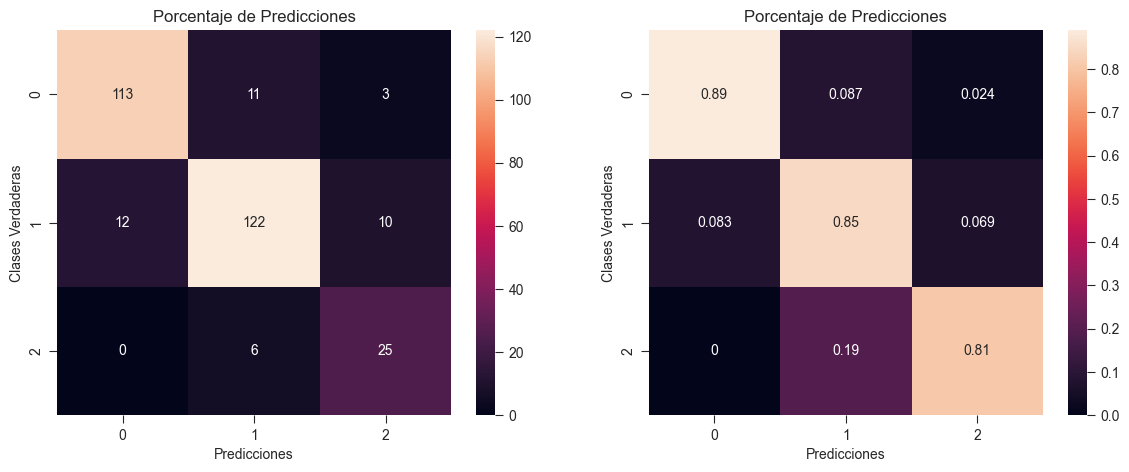

<Figure size 640x480 with 0 Axes>

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", ax=axs[0])
axs[0].set_xlabel('Predicciones')
axs[0].set_ylabel('Clases Verdaderas')
axs[0].set_title('Porcentaje de Predicciones')

cm_2 = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_2, annot=True, ax=axs[1])
plt.xlabel('Predicciones')
plt.ylabel('Clases Verdaderas')
plt.title('Porcentaje de Predicciones')
plt.show()

plt.tight_layout()
plt.show();


#### Reporte del modelo

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       127
           1       0.88      0.85      0.86       144
           2       0.66      0.81      0.72        31

    accuracy                           0.86       302
   macro avg       0.81      0.85      0.83       302
weighted avg       0.87      0.86      0.86       302



#### Guardado

In [85]:
import pickle

filename = 'trained_model_rfc'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_rfc, archivo_salida)

### GradientBoostingClassifier

Este algoritmo construye un modelo aditivo en etapas avanzadas; permite la optimización de funciones de pérdida diferenciables arbitrarias.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

#### Entrenamiento

In [86]:
# Entrenamiento con GradientBoostingClassifier

parameters = {
    'loss': ['log_loss', 'deviance', 'exponential'],     # La función de pérdida que se va a optimizar.
    'learning_rate': [0.6,0.7,0.8,0.9,1],                # La tasa de aprendizaje reduce la contribución de cada árbol.
    'n_estimators': [20,40,60,80,100,120,140],           # El número de etapas de impulso a realizar.
    'max_depth': [8,10,12,14,16]                         # Profundidad máxima de los estimadores de regresión individuales.
}
modelo_gbc = GradientBoostingClassifier()

gbc = GridSearchCV(estimator = modelo_gbc,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

gbc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.6, 0.7, 0.8, 0.9, 1],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [8, 10, 12, 14, 16],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140]},
             scoring='accuracy')

#### Mejores parámetros

In [87]:
print(gbc.best_estimator_)
print(gbc.best_params_)
print(gbc.best_score_)

GradientBoostingClassifier(learning_rate=0.8, max_depth=12, n_estimators=120)
{'learning_rate': 0.8, 'loss': 'log_loss', 'max_depth': 12, 'n_estimators': 120}
0.9258860153256705


#### Predicciones y score del modelo

In [88]:
final_gbc = gbc.best_estimator_
final_gbc.fit(X_train_resampled, y_train_resampled)
y_pred = final_gbc.predict(X_test)
final_gbc.score(X_test, y_test)

0.8841059602649006

#### Matriz de confusión

<Axes: >

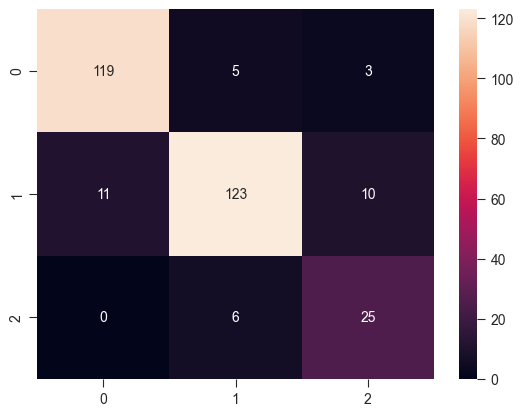

In [89]:
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

#### Reporte del modelo

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       127
           1       0.92      0.85      0.88       144
           2       0.66      0.81      0.72        31

    accuracy                           0.88       302
   macro avg       0.83      0.87      0.85       302
weighted avg       0.89      0.88      0.89       302



#### Guardado

In [91]:
import pickle

filename = 'trained_model_gbc'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_gbc, archivo_salida)

### SupportVectorClasiffier

El objetivo del algoritmo SVM es encontrar un hiperplano que separe de la mejor forma posible dos clases diferentes de puntos de datos.

Fuente: https://es.mathworks.com/discovery/support-vector-machine.html

#### Entrenamiento

In [92]:
# Entrenamiento con SVC

parameters = {
    'C': [15,20,25,30],                                   # Parámetro de regularización.
    'degree': [1,2,3,4,5,6,7],                           # Grado de la función kernel polinomial.
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],      # Especifica el tipo de núcleo que se utilizará en el algoritmo.
    'gamma': ['scale', 'auto']                           # Coeficiente kernel.
}

modelo_svc = svm.SVC()

svc = GridSearchCV(estimator = modelo_svc ,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

svc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [15, 20, 25, 30], 'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

#### Mejores parámetros

In [93]:
print(svc.best_estimator_)
print(svc.best_params_)
print(svc.best_score_)

SVC(C=20, degree=6, kernel='poly')
{'C': 20, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly'}
0.9189655172413792


#### Predicciones y score del modelo

In [94]:
final_svc = svc.best_estimator_
final_svc.fit(X_train_resampled, y_train_resampled)
y_pred = final_svc.predict(X_test)
final_svc.score(X_test,y_test)

0.8973509933774835

#### Matriz de confusión

<Axes: >

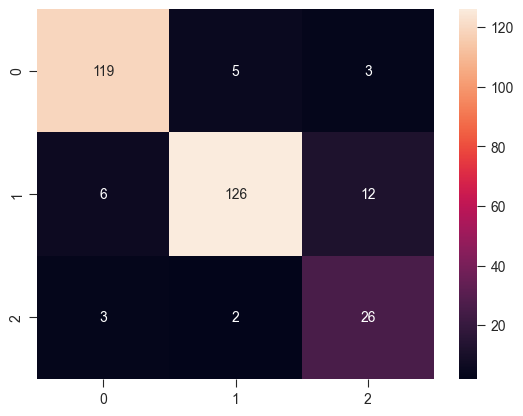

In [95]:
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

#### Reporte del modelo

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       127
           1       0.95      0.88      0.91       144
           2       0.63      0.84      0.72        31

    accuracy                           0.90       302
   macro avg       0.84      0.88      0.86       302
weighted avg       0.91      0.90      0.90       302



#### Guardado

In [97]:
import pickle

filename = 'trained_model_svc'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_svc, archivo_salida)

### BagginClassifier

Un clasificador Bagging es un metaestimador conjunto que ajusta clasificadores base, cada uno de ellos en subconjuntos aleatorios del conjunto de datos original, y luego agrega sus predicciones individuales (ya sea mediante votación o promediando) para formar una predicción final.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

#### Entrenamiento

In [98]:
# Entreno con BagginClassifier

parameters = {
    'estimator': [svm.SVC(), DecisionTreeClassifier()],        # El estimador base para ajustarse a subconjuntos aleatorios del conjunto de datos.
    'n_estimators': [50,60,70,80,90,100],                      # El número de estimadores de base en el conjunto.   
    'max_samples': [500,520,540,560,580],                      # El número de muestras que se extraerán de X para entrenar cada estimador base.
    'bootstrap': [True,False],                                 # Si las muestras se extraen con reemplazo.
    'max_features': [8,9,10,11,12,13,14,15]                    # El número de características que se extraerán de X para entrenar cada estimador base 
}

modelo_bc = BaggingClassifier()

bc = GridSearchCV(estimator = modelo_bc ,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring = "accuracy")

bc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'estimator': [SVC(), DecisionTreeClassifier()],
                         'max_features': [8, 9, 10, 11, 12, 13, 14, 15],
                         'max_samples': [500, 520, 540, 560, 580],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

#### Mejores parámetros

In [99]:
print(bc.best_estimator_)
print(bc.best_params_)
print(bc.best_score_)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_features=15, max_samples=560, n_estimators=70)
{'bootstrap': False, 'estimator': DecisionTreeClassifier(), 'max_features': 15, 'max_samples': 560, 'n_estimators': 70}
0.9071886973180078


#### Predicciones y score del modelo

In [100]:
final_bc = bc.best_estimator_
final_bc.fit(X_train_resampled, y_train_resampled)
y_pred = final_bc.predict(X_test)
final_bc.score(X_test,y_test)

0.8642384105960265

#### Matriz de confusión

<Axes: >

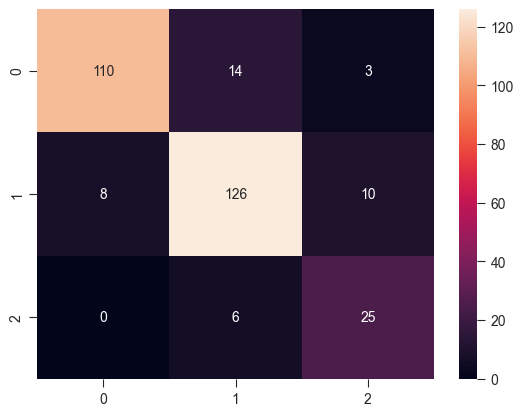

In [101]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

#### Reporte del modelo

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       127
           1       0.86      0.88      0.87       144
           2       0.66      0.81      0.72        31

    accuracy                           0.86       302
   macro avg       0.82      0.85      0.83       302
weighted avg       0.87      0.86      0.87       302



#### Guardado

In [103]:
import pickle

filename = 'trained_model_bc'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_bc, archivo_salida)

### AdaBoostClassifier

Un clasificador AdaBoost es un metaestimador que comienza ajustando un clasificador en el conjunto de datos original y luego ajusta copias adicionales del clasificador en el mismo conjunto de datos, pero donde los pesos de las instancias clasificadas incorrectamente se ajustan de modo que los clasificadores posteriores se centren más en casos difíciles.

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

#### Entrenamiento

In [104]:
# Entreno con AdaBoostClassifier

parameters = {
    'estimator': [svm.SVC(), DecisionTreeClassifier()],     # El estimador base a partir del cual se construye el conjunto potenciado. 
    'n_estimators': [20,30,40,50,60,70,80],                 # El número máximo de estimadores en los que finaliza el impulso.
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6]              # Peso aplicado a cada clasificador en cada iteración de impulso.
}

modelo_abc = AdaBoostClassifier()

abc = GridSearchCV(estimator = modelo_abc ,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

abc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'estimator': [SVC(), DecisionTreeClassifier()],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
             scoring='accuracy')

#### Mejores parámetros

In [105]:
print(abc.best_estimator_)
print(abc.best_params_)
print(abc.best_score_)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.4,
                   n_estimators=60)
{'estimator': DecisionTreeClassifier(), 'learning_rate': 0.4, 'n_estimators': 60}
0.923817049808429


#### Predicciones y score del modelo

In [106]:
final_abc = abc.best_estimator_
final_abc.fit(X_train_resampled, y_train_resampled)
y_pred = final_abc.predict(X_test)
final_abc.score(X_test,y_test)

0.8675496688741722

#### Matriz de confusión

<Axes: >

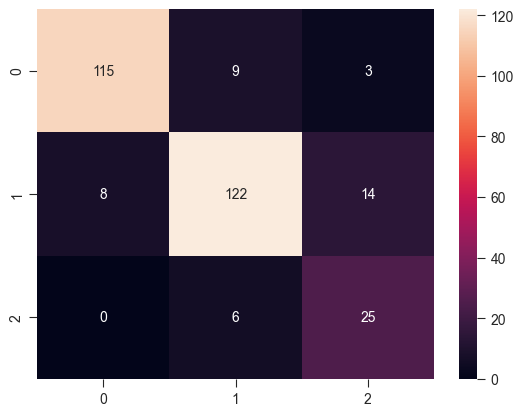

In [107]:
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

#### Reporte del modelo

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       127
           1       0.89      0.85      0.87       144
           2       0.60      0.81      0.68        31

    accuracy                           0.87       302
   macro avg       0.81      0.85      0.82       302
weighted avg       0.88      0.87      0.87       302



#### Guardado

In [109]:
import pickle

filename = 'trained_model_abc'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_abc, archivo_salida)

### Modelo no supervisado (PCA)

#### Entrenamiento

In [110]:
pipe_gs_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', svm.SVC())
])
pipe_gs_rf

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier', SVC())])

In [111]:
params = {
    "scaler" : [StandardScaler(), MinMaxScaler(), None],
    "pca__n_components": [5,6,7,8,9,10,11,12,13,14,15,16],
    'classifier__C': [15,20,25,30],                                   
    'classifier__degree': [1,2,3,4,5,6,7],                           
    'classifier__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],      
    'classifier__gamma': ['scale', 'auto'] 
}

In [112]:
gs = GridSearchCV(pipe_gs_rf, params, cv=10, scoring="accuracy", n_jobs=-1)

gs.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [15, 20, 25, 30],
                         'classifier__degree': [1, 2, 3, 4, 5, 6, 7],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf', 'sigmoid',
                                                'poly'],
                         'pca__n_components': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16],
                         'scaler': [StandardScaler(), MinMaxScaler(), None]},
             scoring='accuracy')

#### Mejores parámetros

In [113]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('classifier',
                 SVC(C=15, degree=5, gamma='auto', kernel='poly'))])
{'classifier__C': 15, 'classifier__degree': 5, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly', 'pca__n_components': 8, 'scaler': StandardScaler()}
0.9244827586206895


#### Predicciones y score del modelo

In [114]:
final_gs = gs.best_estimator_
final_gs.fit(X_train_resampled, y_train_resampled)
y_pred = final_gs.predict(X_test)
final_gs.score(X_test,y_test)

0.8774834437086093

#### Matriz de confusión

<Axes: >

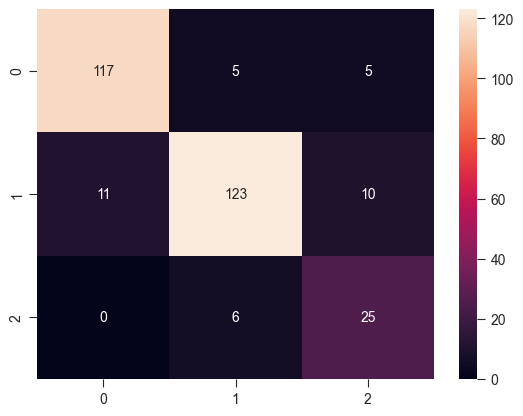

In [115]:
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

#### Reporte del modelo

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       127
           1       0.92      0.85      0.88       144
           2       0.62      0.81      0.70        31

    accuracy                           0.88       302
   macro avg       0.82      0.86      0.84       302
weighted avg       0.89      0.88      0.88       302



#### Guardado

In [117]:
import pickle

filename = 'trained_model_gs'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_gs, archivo_salida)

### Elección del mejor modelo.

In [124]:
modelos = [final_rfc, final_gbc, final_svc, final_bc, final_abc, final_gs]

df_modelos = pd.DataFrame(columns=["accuracy"])

for modelo in modelos:
    accuracy_valor = modelo.score(X_test,y_test)
    df_modelos.loc[str(modelo)] = accuracy_valor

df_modelos.sort_values(by="accuracy", ascending=False)

,accuracy
"SVC(C=20, degree=6, kernel='poly')",0.897351
"GradientBoostingClassifier(learning_rate=0.8, max_depth=12, n_estimators=120)",0.884106
"Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8)),\n ('classifier',\n SVC(C=15, degree=5, gamma='auto', kernel='poly'))])",0.877483
"AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.4,\n n_estimators=60)",0.867550
"BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),\n max_features=15, max_samples=560, n_estimators=70)",0.864238
"RandomForestClassifier(bootstrap=False, criterion='log_loss',\n max_leaf_nodes=180, n_estimators=20)",0.860927


**El mejor modelos de todos los que entrenamos en el SVC con un accuracy de 0,897.**

#### Guardar parámetros en yaml

In [125]:
import yaml

filename = 'trained_model_svc_best_params'
with open(filename, 'w') as file:
    yaml.dump(svc.best_params_, file)

### Features Importance

El modelo svm.SVC() no proporciona feature_importances_ por lo que utilizamos el modelo RandomForestClassifier() para obtenerlo.

In [132]:
modelo_rfc = RandomForestClassifier()
modelo_rfc.fit(X_train, y_train)
importancias = modelo_rfc.feature_importances_

df_importancias = pd.DataFrame({'Característica': X_train.columns, 'Importancia': importancias})

df_importancias.sort_values(by="Importancia", ascending=False)

,Característica,Importancia
8,Class Duration,0.162503
0,Age,0.126514
5,Financial Condition,0.117102
1,Education Level,0.070606
3,Location,0.063730
6,Internet Type,0.063703
7,Network Type,0.060379
9,Self Lms,0.053848
2,IT Student,0.049724
4,Load-shedding,0.045853
